In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [2]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

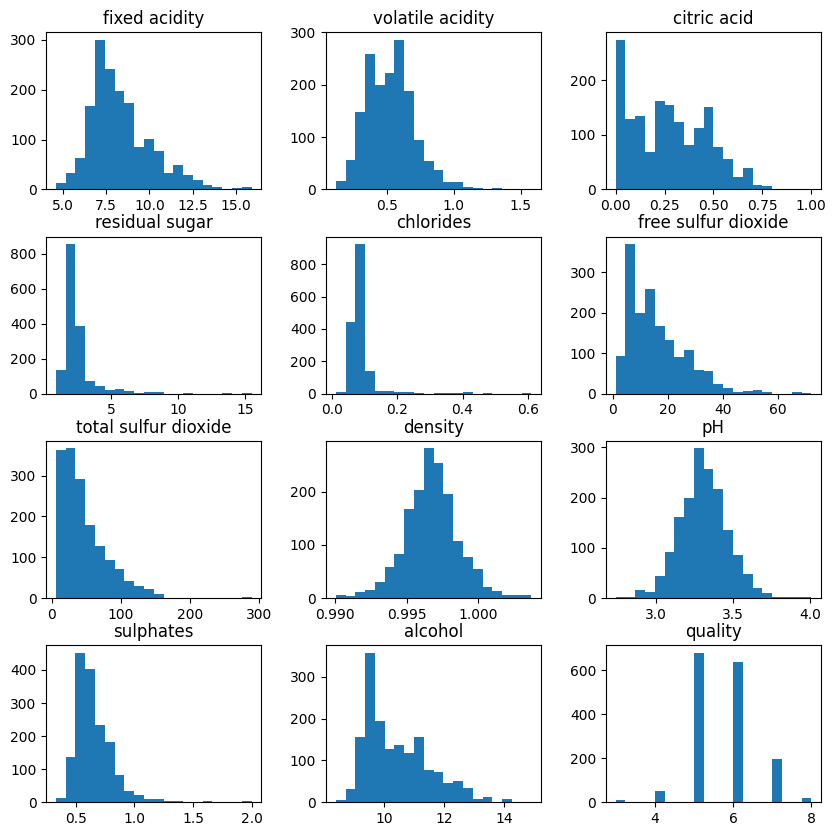

In [9]:
df.hist(bins=20, figsize=(10, 10), grid=False)
plt.show()

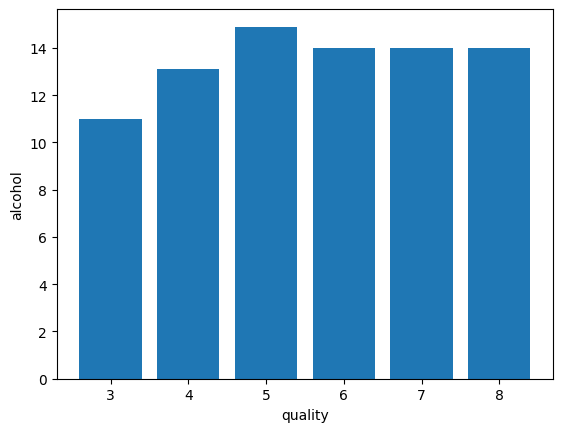

In [15]:
plt.bar(df["quality"], df["alcohol"])
plt.ylabel("alcohol")
plt.xlabel("quality")
plt.show()

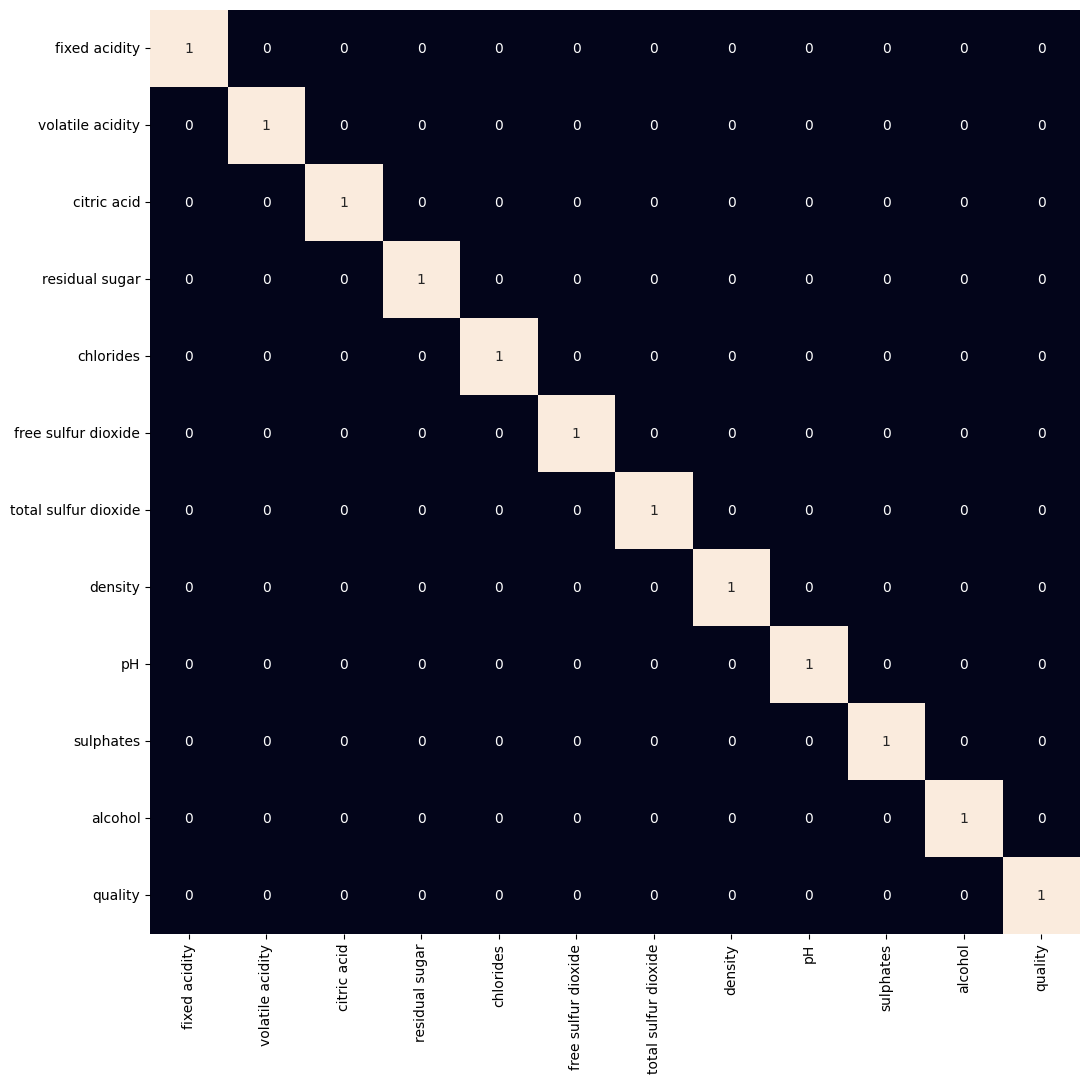

In [20]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [21]:
df["best_quality"] = [1 if x > 5 else 0 for x in df.quality]

In [23]:
df["best_quality"].value_counts()

1    855
0    744
Name: best_quality, dtype: int64

In [34]:
features = df.drop(["quality", "best_quality"], axis=1)
target = df["best_quality"]

In [35]:
x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)
print(f"x_train shape: {x_train.shape}\nx_test shape: {x_test.shape}")

x_train shape: (1279, 11)
x_test shape: (320, 11)


In [43]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [44]:
print(len(x_train), len(x_test), sep="\n")

1279
320


In [45]:
print(len(x_train_scaled), len(x_test_scaled), sep="\n")

1279
320


In [51]:
lin_reg = LinearRegression()
log_reg = LogisticRegression()
svc = SVC(kernel="rbf")
models = [lin_reg, log_reg, svc]

for model in models:
    model.fit(x_train_scaled, y_train)

    print(f"Model: {model}")
    print(f"Training accuracy: {roc_auc_score(y_train, model.predict(x_train_scaled)):.3f}")
    print(f"Validation accuracy: {roc_auc_score(y_test, model.predict(x_test_scaled)):.3f}")
    print()

Model: LinearRegression()
Training accuracy: 0.822
Validation accuracy: 0.818

Model: LogisticRegression()
Training accuracy: 0.749
Validation accuracy: 0.741

Model: SVC()
Training accuracy: 0.779
Validation accuracy: 0.749



In [73]:
y_pred = models[0].predict(x_test_scaled)
y_pred = np.argmax(y_pred, axis=0)
print(y_pred)

259


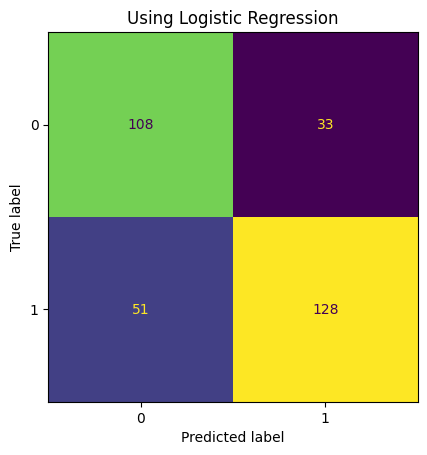

In [72]:
y_pred = models[1].predict(x_test_scaled)
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False)
plt.title("Using Logistic Regression")
plt.show()

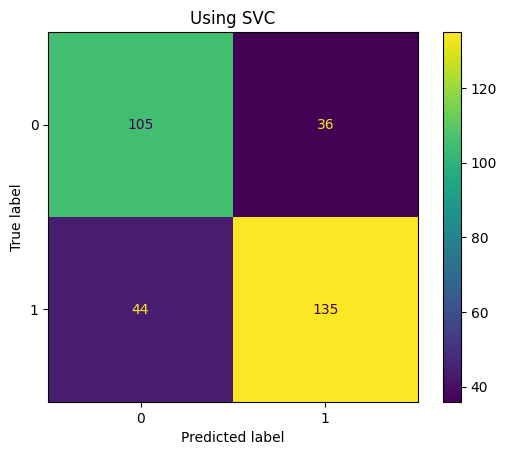

In [71]:
y_pred = models[2].predict(x_test_scaled)
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Using SVC")
plt.show()

In [75]:
print(metrics.classification_report(y_test, models[1].predict(x_test_scaled)))  # log_reg

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       141
           1       0.80      0.72      0.75       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



In [76]:
print(metrics.classification_report(y_test, models[2].predict(x_test_scaled)))  # svc

              precision    recall  f1-score   support

           0       0.70      0.74      0.72       141
           1       0.79      0.75      0.77       179

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320

